Memulai proses RFECV...

Proses RFECV Selesai.
Jumlah Fitur Awal: 123
Jumlah Fitur Optimal: 26
Fitur-Fitur yang Terpilih (26 fitur):
- 1_AIT_003_PV
- 1_LS_002_AL
- 1_P_002_STATUS
- 1_P_006_STATUS
- Sensor_30
- Sensor_33
- Sensor_37
- Sensor_38
- Sensor_47
- Sensor_52
- Sensor_53
- Sensor_59
- Sensor_67
- Sensor_68
- Sensor_72
- Sensor_74
- Sensor_75
- Sensor_79
- Sensor_89
- Sensor_90
- Sensor_92
- Sensor_97
- Sensor_107
- Sensor_114
- Sensor_117
- LEAK_DIFF_PRESSURE


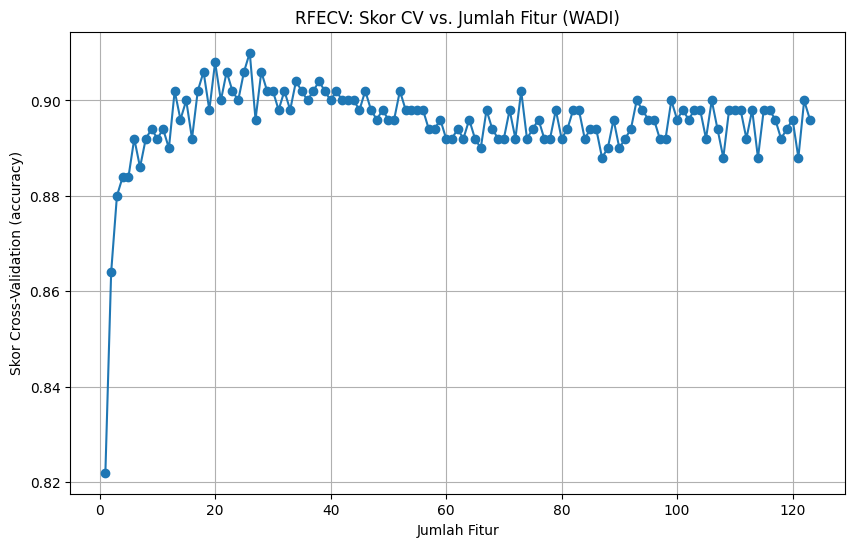

In [4]:
# Menerapkan Recursive Feature Elimination with Cross-Validation (RFECV)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv('WADI.csv')
target_column = 'Attack'

df_clean = df.drop(columns=['Date', 'Time']).copy()
X = df_clean.drop(columns=[target_column])
y = df_clean[target_column]

X = X.fillna(0)

estimator = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv_strategy = StratifiedKFold(5) 
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv_strategy,
    scoring='accuracy',
    min_features_to_select=1
)

print("Memulai proses RFECV...")
rfecv.fit(X, y)

optimal_feature_count = rfecv.n_features_
selected_features_mask = rfecv.support_
selected_feature_names = X.columns[selected_features_mask].tolist()

X_selected = X[selected_feature_names]

print("\nProses RFECV Selesai.")
print(f"Jumlah Fitur Awal: {X.shape[1]}")
print(f"Jumlah Fitur Optimal: {optimal_feature_count}")
print(f"Fitur-Fitur yang Terpilih ({optimal_feature_count} fitur):")
for feature in selected_feature_names:
    print(f"- {feature}")

# Bagian kode untuk visualisasi
scores = rfecv.cv_results_['mean_test_score']
num_features = range(1, len(scores) + 1)
plt.figure(figsize=(10, 6))
plt.plot(num_features, scores, marker='o')
plt.xlabel("Jumlah Fitur")
plt.ylabel(f"Skor Cross-Validation ({rfecv.scoring})")
plt.title("RFECV: Skor CV vs. Jumlah Fitur (WADI)")
plt.grid(True)
plt.show()

Memulai proses RFECV pada dataset SWAT...

Proses RFECV Selesai.
Jumlah Fitur Awal: 52
Jumlah Fitur Optimal: 52
Fitur-Fitur yang Terpilih (52 fitur):
- P206
- DPIT301
- FIT301
- LIT301
- MV301
- MV302
- MV303
- MV304
- P301
- P302
- AIT401
- AIT402
- FIT401
- LIT401
- P401
- P402
- P403
- P404
- UV401
- AIT501
- AIT502
- AIT503
- AIT504
- FIT501
- FIT502
- FIT503
- FIT504
- P501
- P502
- PIT501
- PIT502
- PIT503
- FIT601
- P601
- P602
- P603
- Sensor_0
- Sensor_1
- Sensor_2
- Sensor_3
- Sensor_4
- Sensor_5
- Sensor_6
- Sensor_7
- Sensor_8
- Sensor_9
- Sensor_10
- Sensor_11
- Sensor_12
- Sensor_13
- Sensor_14
- Sensor_15


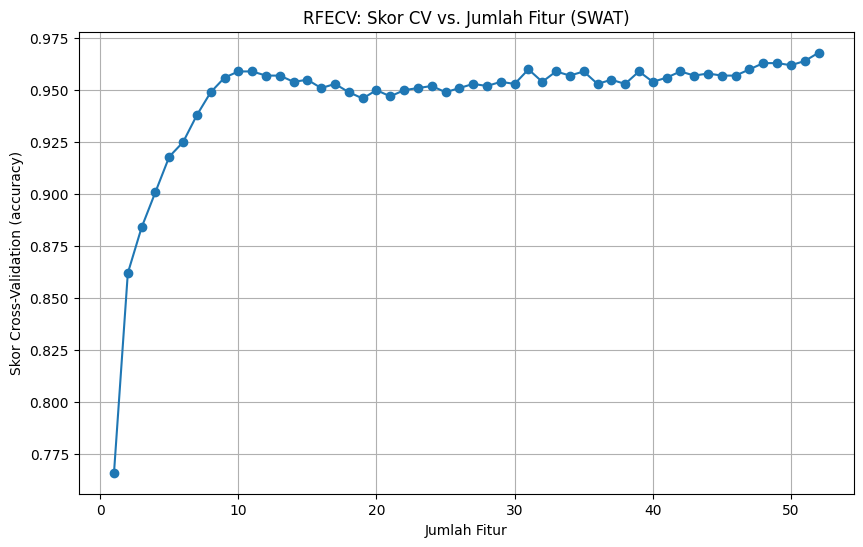

In [ ]:
# Menerapkan Recursive Feature Elimination with Cross-Validation (RFECV)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv('SWAT_Dataset.csv')
target_column = 'Normal/Attack'

X = df.drop(columns=[target_column])
y_raw = df[target_column]

# Mengubah kolom target (string) menjadi numerik biner: Normal=0, Attack=1
y = y_raw.apply(lambda x: 1 if x.strip() == 'Attack' else 0)

X = X.fillna(0)

estimator = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv_strategy = StratifiedKFold(5, shuffle=True, random_state=42)
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv_strategy,
    scoring='accuracy', 
    min_features_to_select=1 
)

print("Memulai proses RFECV pada dataset SWAT...")
rfecv.fit(X, y)

optimal_feature_count = rfecv.n_features_
selected_features_mask = rfecv.support_
selected_feature_names = X.columns[selected_features_mask].tolist()

X_selected = X[selected_feature_names]

print("\nProses RFECV Selesai.")
print(f"Jumlah Fitur Awal: {X.shape[1]}")
print(f"Jumlah Fitur Optimal: {optimal_feature_count}")
print(f"Fitur-Fitur yang Terpilih ({optimal_feature_count} fitur):")
for feature in selected_feature_names:
    print(f"- {feature}")

# Bagian kode untuk visualisasi
scores = rfecv.cv_results_['mean_test_score']
num_features = range(1, len(scores) + 1)
plt.figure(figsize=(10, 6))
plt.plot(num_features, scores, marker='o')
plt.xlabel("Jumlah Fitur")
plt.ylabel(f"Skor Cross-Validation ({rfecv.scoring})")
plt.title("RFECV: Skor CV vs. Jumlah Fitur (SWAT)")
plt.grid(True)
plt.show()